In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


In [3]:
points_df = pd.DataFrame(points,columns=['X','Y'])

In [8]:
points_df

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097
...,...,...
95,-8.196213,9.242504
96,3.608494,-2.219914
97,1.238222,10.033733
98,6.272034,-6.642784


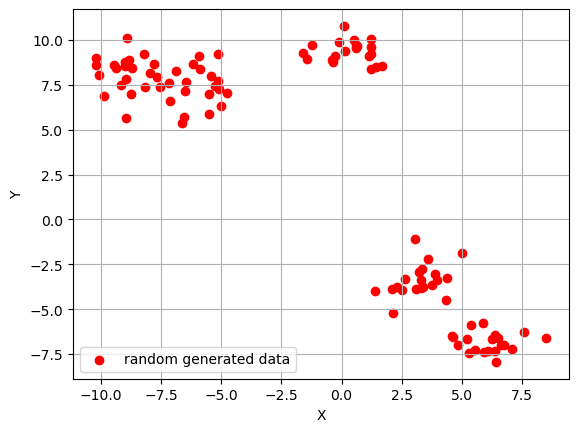

In [30]:
fig,ax= plt.subplots()
ax.scatter(points_df['X'],points_df['Y'],color='red',label='random generated data')
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

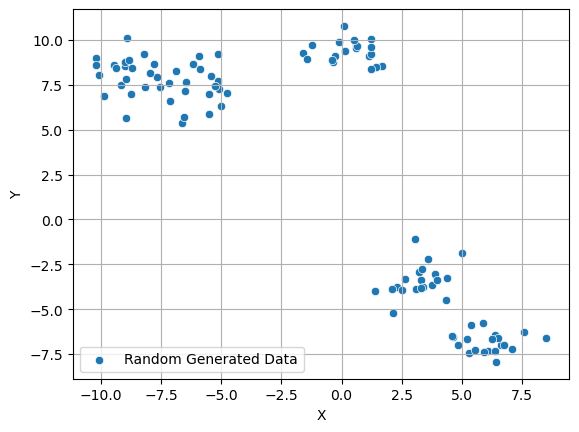

In [34]:
plt.figure()
sns.scatterplot(x=points_df['X'],y=points_df['Y'],label='Random Generated Data')
plt.legend()
plt.grid()
plt.show()

### K-mean 알고리즘의 순서


    1. 원하는 클러스터의 수(K)를 결정합니다.  

    2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.  

    3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.  

    4. 각 K개의 클러스터의 중심점을 재조정합니다.   

    5. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이 중심점은 실제로 존재하는 데이터가 아니어도 상관없습니다.)  

    6. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.  

    7. 4.번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더 이상 바뀌지 않음)하게 됩니다. 

In [60]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=2)

kmeans_cluster.fit(points_df)

/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [61]:
print(type(kmeans_cluster.labels_))
print(kmeans_cluster.labels_.shape)
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1]


In [62]:
kmeans_cluster.labels_

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [63]:
points

array([[  4.63411914,  -6.52590383],
       [ -6.52008604,   7.16624288],
       [  2.14142339,  -5.21092623],
       [  1.70054231,   8.54077897],
       [ -0.33809159,   8.76509668],
       [ -7.69329744,   7.94546313],
       [  3.89090121,  -3.06531839],
       [  3.22338498,  -2.93209009],
       [ -6.63962964,   5.34777334],
       [  6.37904965,  -6.46617328],
       [ -6.19513603,   8.67958538],
       [ -6.54456576,   5.69456934],
       [ -6.87816116,   8.26136085],
       [ -8.15968774,   7.35585587],
       [ -5.10450757,   7.27558278],
       [ -5.41637264,   8.00782206],
       [  2.29891791,  -3.76172472],
       [ -5.52485035,   6.97554226],
       [  3.76292855,  -3.67664494],
       [  3.09957083,  -3.90219702],
       [  7.5920418 ,  -6.28206012],
       [ -5.9317774 ,   9.12024252],
       [ -9.01109136,   8.56034769],
       [ -9.16244206,   7.50311967],
       [  1.12720364,   9.12964638],
       [ -6.46997353,   7.67635187],
       [  2.10420542,  -3.87270042],
 

In [64]:
color_dict = {0:'red',1:'blue',2:'green',3:'brown',4:'indigo'}

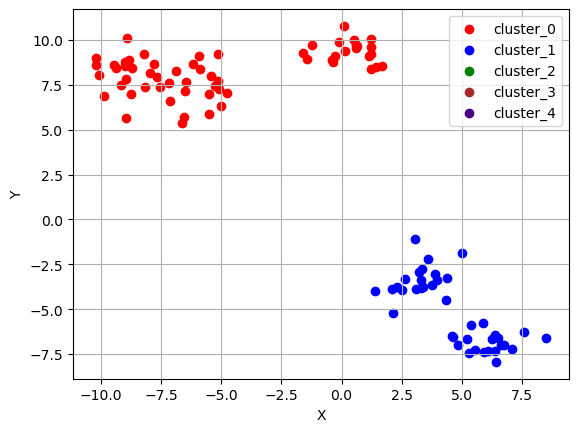

In [65]:
fig, ax = plt.subplots()

for cluster in range(5) :
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.legend()
plt.show()

### K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포

/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


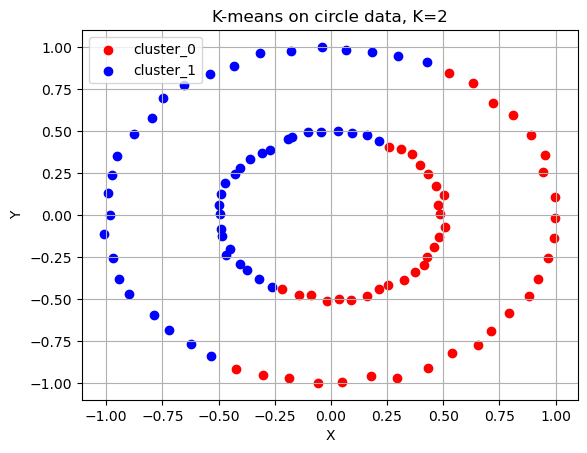

In [66]:
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포

/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


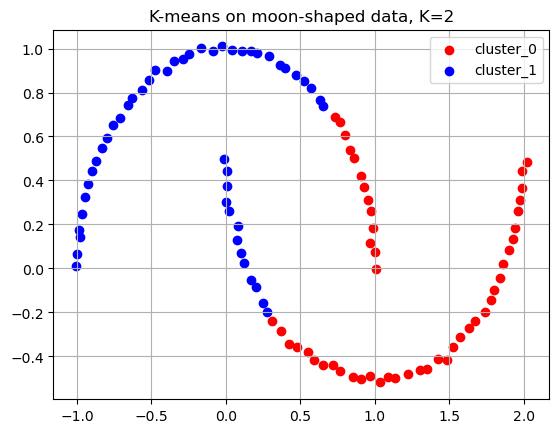

In [77]:
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.fit(moon_points)

fig, ax = plt.subplots()

for cluster in range(2):
    cluster_sub_plots = moon_points[ cluster == kmeans_cluster.labels_]
    ax.scatter(cluster_sub_plots[:,0],cluster_sub_plots[:,1], c=color_dict[cluster],label='cluster_{}'.format(cluster))
    
ax.grid()
ax.legend()
plt.title('K-means on moon-shaped data, K=2')
plt.show()

In [81]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# Kmeans Load & Fit
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.fit(moon_points)
kmeans_cluster.labels_

/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

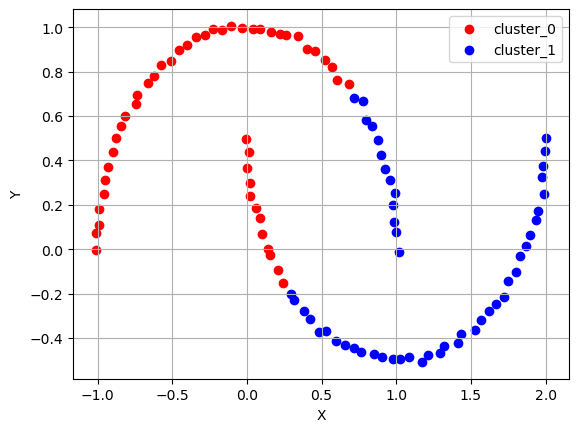

In [88]:

# 캔버스 생성
fig, ax = plt.subplots()

# 달 모양 분포 데이터 plot
for cluster in range(2):
    #sub cluster 생성
    sub_cluster = moon_points[kmeans_cluster.labels_==cluster]
    ax.scatter(sub_cluster[:,0],sub_cluster[:,1],c=color_dict[cluster],label='cluster_{}'.format(cluster))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.legend()
plt.show()

### K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포

In [89]:
# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.


In [90]:
diag_points

array([[-3.54584073,  1.28882246],
       [ 1.8973666 , -2.00315594],
       [ 1.27685421, -1.50664407],
       [-2.72278495,  0.29373251],
       [-2.48594923, -0.04554323],
       [-3.58293826,  4.57217533],
       [-3.56767389,  3.73189205],
       [-2.55390925, -0.18424666],
       [ 1.00952317, -1.27263897],
       [-2.92163176,  2.48261869],
       [-2.41228252,  2.72882728],
       [-4.41704456,  4.86439745],
       [-2.25034242, -0.37757721],
       [-1.77785331,  1.46538059],
       [-2.90166639,  0.37525796],
       [ 1.2614691 , -1.2526741 ],
       [-3.90171728,  4.55988172],
       [-2.28890462,  1.95784049],
       [-2.13504621,  2.08386724],
       [ 0.91922639, -1.14253918],
       [ 0.26518003,  0.36431397],
       [ 0.38806374, -0.42537644],
       [ 1.46023474, -1.66958658],
       [ 2.05741068, -2.47072847],
       [-2.4773502 ,  2.44762308],
       [-2.76559723,  2.6292989 ],
       [-2.54655855,  0.2365876 ],
       [ 0.93746154, -0.59532851],
       [-3.47605575,

In [91]:
#KMeans Fitting

In [93]:
kmeans_cluster = KMeans(n_clusters=2)

In [95]:
kmeans_cluster.fit(diag_points)

/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [96]:
kmeans_cluster.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [92]:
#Scatter

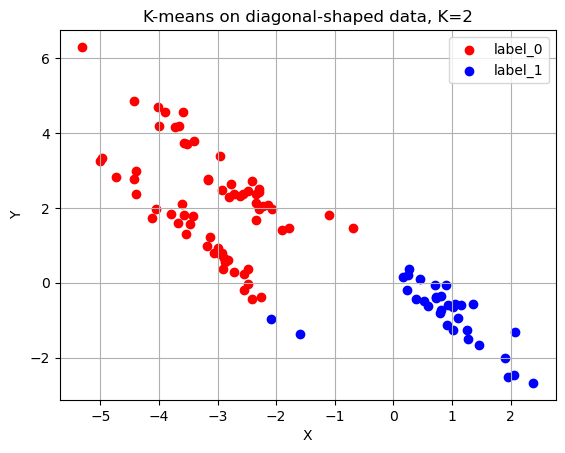

In [101]:
fig,ax = plt.subplots()
for cluster in range(2):
    sub_plots = diag_points[ cluster == kmeans_cluster.labels_ ]
    ax.scatter(sub_plots[:,0],sub_plots[:,1],c=color_dict[cluster],label='label_{}'.format(cluster))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.legend()
ax.set_title('K-means on diagonal-shaped data, K=2')
plt.show()